In [1]:
#include <TChain.h>
#include <vector>
#include <TFile.h>
#include <iostream>
#include <string>
#include <stdio.h>

In [2]:
TFile *file = TFile::Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root");

In [3]:
TTree *tree = (TTree*) file->Get("mini");
int nentries = tree->GetEntries();
cout << nentries << endl;

53653


In [4]:
UInt_t  lepton_n = -1;  //number of preselected leptons

vector<float>   *lepton_charge;  
vector<float>   *lepton_type;
vector<float>   *lepton_pt = 0; //transverse momentum of the lepton
vector<float>   *lepton_eta = 0; //pseudorapidity of the lepton
vector<float>   *lepton_phi = 0;  //azimuthal angle of the lepton
vector<float>   *lepton_E   = 0;  //energy of the lepton

In [5]:
tree->SetBranchAddress("lep_n",      &lepton_n);
tree->SetBranchAddress("lep_charge", &lepton_charge);
tree->SetBranchAddress("lep_type",   &lepton_type);
tree->SetBranchAddress("lep_pt",     &lepton_pt);
tree->SetBranchAddress("lep_eta",    &lepton_eta);
tree->SetBranchAddress("lep_phi",    &lepton_phi);
tree->SetBranchAddress("lep_E",    &lepton_E);
tree->GetEntry(0);
cout << lepton_n << endl;
cout << lepton_pt->at(0) << endl;
cout << lepton_charge->at(1) << endl;

2
169903
-1


In [6]:
float fraction_events = 1.0;
float events_to_run = nentries*fraction_events;

cout << "Total # events = "  << nentries
     << ". Events to run = " << events_to_run
     << " corresponding to " << fraction_events*100
     << "% of total events!" << endl;

Total # events = 53653. Events to run = 53653 corresponding to 100% of total events!


In [7]:
TLorentzVector leadLepton = TLorentzVector();
TLorentzVector trailLepton = TLorentzVector();

In [8]:
TCanvas *canvas = new TCanvas();
TH1F *hist = new TH1F("variable", "Mass of the Z boson", 30, 40, 140);

In [9]:
int nevents = 0;
for (int ii=0; ii<events_to_run; ii++)
{
    tree->GetEntry(ii);
    nevents++;
    // Cut #1: At least 2 leptons
    
    if (lepton_n >= 2)
    {
        // Cut #2: Leptons with opposite charge
        if (lepton_charge->at(0) != lepton_charge->at(1))
        {
            // Cut #3: Leptons of the same family (2 electrons or 2 muons)
            if (lepton_type->at(0) == lepton_type->at(1))
            {
                // Let's define one TLorentz vector for each, e.i. two vectors!
                leadLepton.SetPtEtaPhiE(lepton_pt->at(0), lepton_eta->at(0), lepton_phi->at(0), lepton_E->at(0));
                trailLepton.SetPtEtaPhiE(lepton_pt->at(1), lepton_eta->at(1), lepton_phi->at(1), lepton_E->at(1));
                // Next line: addition of two TLorentz vectors above --> ask mass very easy (divide by 1000 to get value in GeV)
                TLorentzVector invmass = TLorentzVector();
                invmass = leadLepton + trailLepton;
                float inv_mass_GeV = invmass.M()/1000.;
                hist->Fill(inv_mass_GeV);
            }
        }
    }
    
}

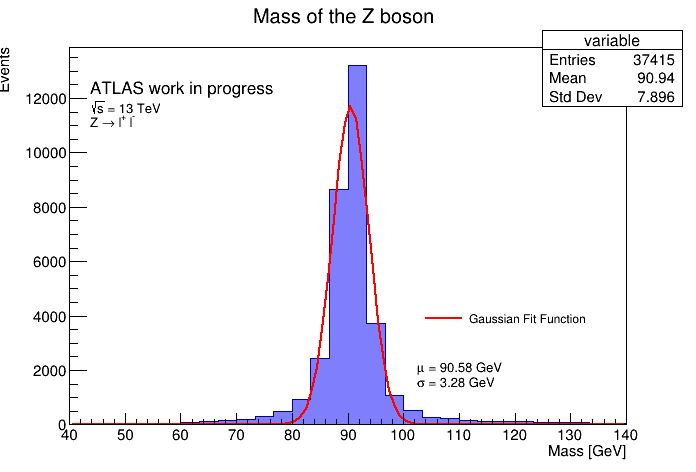

In [11]:
hist->GetXaxis()->SetTitle("Mass [GeV]");
hist->GetYaxis()->SetTitle("Events");
//hist->SetStats(0);
hist->SetFillColorAlpha(kBlue, 0.5); //Azúl con menor intensidad

TLegend *leg = new TLegend(0.6, 0.25, 0.9, 0.4);
leg->AddEntry(fit, "Gaussian Fit Function","l");
leg->SetBorderSize(0);
//leg->AddEntry(hist_bkg_met, "Background (WW)","l");

TF1 *fit = new TF1("fit", "gaus", 40, 140);
fit->SetParameter(0, 13000);
fit->SetParameter(1, 91);
fit->SetParameter(2, 8);

TStyle *atlasStyle = new TStyle("ATLAS","Atlas style");
Int_t icol=0; // WHITE
atlasStyle->SetFrameBorderMode(icol);
atlasStyle->SetFrameFillColor(icol);
atlasStyle->SetCanvasBorderMode(icol);
atlasStyle->SetCanvasColor(icol);
atlasStyle->SetPadBorderMode(icol);
atlasStyle->SetPadColor(icol);
atlasStyle->SetStatColor(icol);
atlasStyle->SetPaperSize(20,26);
atlasStyle->SetPadTopMargin(0.05);
atlasStyle->SetPadRightMargin(0.05); 
atlasStyle->SetPadBottomMargin(0.16);
atlasStyle->SetPadLeftMargin(0.16); 
atlasStyle->SetTitleXOffset(1.4);
atlasStyle->SetTitleYOffset(1.4);
Int_t font=42; // Helvetica
Double_t tsize=0.05;
atlasStyle->SetTextFont(font);
atlasStyle->SetTextSize(tsize);
atlasStyle->SetLabelFont(font,"x");
atlasStyle->SetTitleFont(font,"x");
atlasStyle->SetLabelFont(font,"y");
atlasStyle->SetTitleFont(font,"y");
atlasStyle->SetLabelFont(font,"z");
atlasStyle->SetTitleFont(font,"z");
atlasStyle->SetLabelSize(tsize,"x");
atlasStyle->SetTitleSize(tsize,"x");
atlasStyle->SetLabelSize(tsize,"y");
atlasStyle->SetTitleSize(tsize,"y");
atlasStyle->SetLabelSize(tsize,"z");
atlasStyle->SetTitleSize(tsize,"z");
atlasStyle->SetMarkerStyle(20);
atlasStyle->SetMarkerSize(1.2);
atlasStyle->SetHistLineWidth(2.);
atlasStyle->SetLineStyleString(2,"[12 12]"); // postscript dashes
atlasStyle->SetEndErrorSize(0.);
atlasStyle->SetOptTitle(0);
atlasStyle->SetOptStat(0);
atlasStyle->SetOptFit(0);
atlasStyle->SetPadTickX(1);
atlasStyle->SetPadTickY(1);

TLatex l;
l.SetNDC();
l.SetTextFont(42);
l.SetTextColor(kBlack);
l.SetTextSize(0.04);  
l.DrawLatex(0.13,0.8,"ATLAS work in progress");

TLatex o;
o.SetNDC();
o.SetTextFont(42);
o.SetTextColor(kBlack);
o.SetTextSize(0.03);
double dely = 0.04; 
o.DrawLatex(0.13,0.8-dely, Form("#sqrt{s} = 13 TeV"));
o.DrawLatex(0.13,0.77-dely, Form("Z #rightarrow l^{+} l^{-}"));

double mean = fit->GetParameter(1);
double std = fit->GetParameter(2);

TLatex p;
p.SetNDC();
p.SetTextFont(42);
p.SetTextColor(kBlack);
p.SetTextSize(0.03);
//double dely = 0.04; 
p.DrawLatex(0.6,0.25-dely, Form("#mu = 90.58 GeV"));
p.DrawLatex(0.6,0.22-dely, Form("#sigma = 3.28 GeV"));

//hist->Draw();
//hist->Fit("fit", "R");
leg->Draw();
c1->Draw();